<a href="https://colab.research.google.com/github/AbhijeetAnand45/know_your_avatar/blob/master/Automated_covid_detection_using_CTscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## COVID19 DETECTION USING DEEP LEARNING FROMU CT SCAN IMAGE BY ABHIJEET and Saket Kumar Roy

# IMPORTING LIBRARIES

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np


from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


print("All libraries are imported")

All libraries are imported


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path='/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="covid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

path='/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

Define the variables and path

In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224]

# training config:
epochs = 200
batch_size = 32

# define paths
covid_path = '/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID'
noncovid_path = '/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID'

# Use glob to grab images from path .jpg or jpeg
# covid_files = glob('datasets/CT_COVID/*')
covid_files = glob(covid_path + '/*')
print(len(covid_files))
noncovid_files = glob(noncovid_path + '/*')
print(len(noncovid_files))


349
397


In [ ]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("_________________________________________________________________________________________________________________________")
print("Total Count: ",len(covid_files))
print("_________________________________________________________________________________________________________________________")
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("_________________________________________________________________________________________________________________________")
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID/covid0.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID/covid1.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID/covid2.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID/covid3.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID/covid4.png']
_________________________________________________________________________________________________________________________
Total Count:  349
_________________________________________________________________________________________________________________________
First 5 NonCovid Files:  ['/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID/noncovid0.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID/noncovid1.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID/noncovid2.png', '/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID/noncovid3.png', '/content/drive/MyDrive/Co

# New Section

Fetch Images and Class Labels from Files

In [ ]:
covid_labels = []                                    # Empty lists for append the labels
noncovid_labels = []

covid_images=[]                                      # Empty lists for append the images
noncovid_images=[]

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i])                  # reading the file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
  image = cv2.resize(image,(224,224))                 # resize as per model
  covid_images.append(image)                          # append image
  covid_labels.append('CT_COVID')                     #append class label
  
for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

visualizing the datasets

In [ ]:
# define the function for plotting the image

def plot_images_from_datasets(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

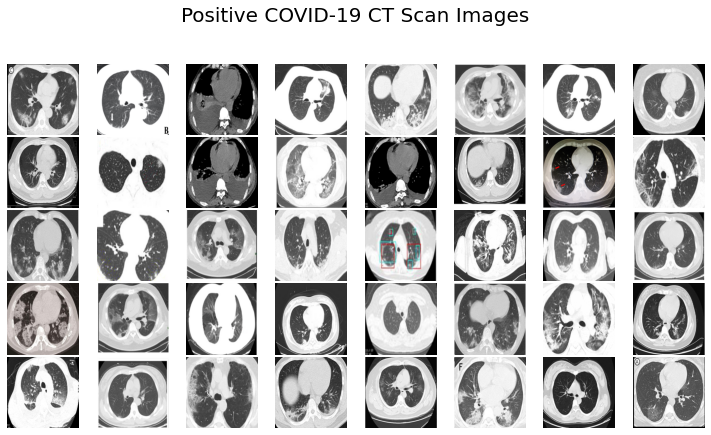

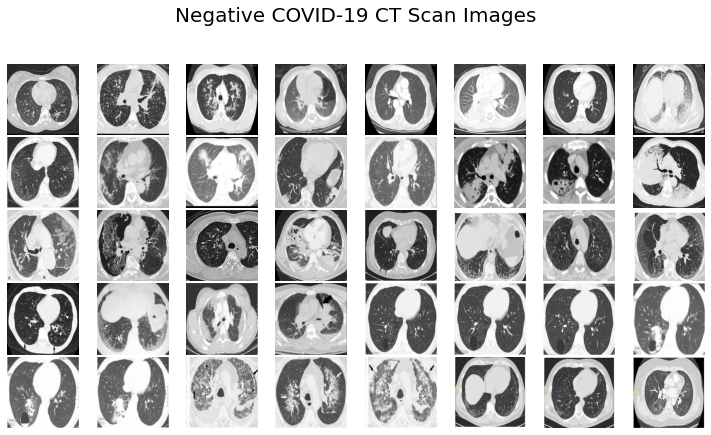

In [ ]:
# Plotting the Positive COVID and Negative COVID datasets

plot_images_from_datasets(covid_images, 'Positive COVID-19 CT Scan Images')
plot_images_from_datasets(noncovid_images, 'Negative COVID-19 CT Scan Images')

# Convert to array and Normalize to interval
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

Split the dataset into train,test and concatenate the datasets

In [18]:
import os
base_dir = '/content/covid19_CT'
os.mkdir(base_dir,exist_ok=True)

TypeError: ignored

In [19]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
os.mkdir(test_noncovid_dir)

FileExistsError: ignored

In [20]:
original_dataset_dir_covid = '/content/drive/MyDrive/Colab Notebooks/datasets/CT_COVID'
original_dataset_dir_non_covid = '/content/drive/MyDrive/Colab Notebooks/datasets/CT_NonCOVID'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(300, 349)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300, 350)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(350, 397)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

NameError: ignored

In [ ]:
# Split into training and testing sets 

# COVID Positive 
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

#COVID Negative
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

In [16]:
# Create and Compile the Model
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 256)     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=20,
                                                        class_mode='binary')

NameError: ignored

In [ ]:
# Fit the model 
history = model.fit(train_generator,
                              steps_per_epoch=12,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=5)

NameError: ignored

5/5 [==============================] - 10s 2s/step


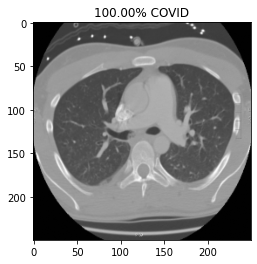

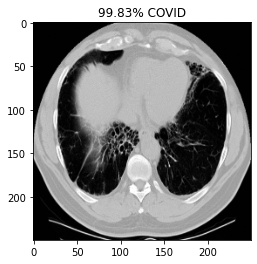

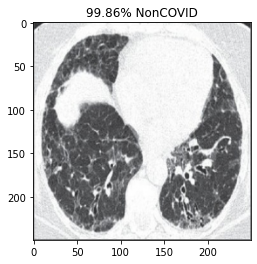

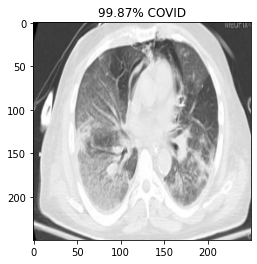

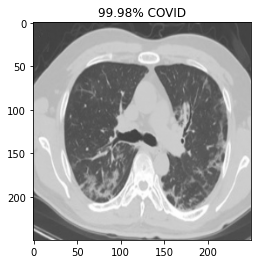

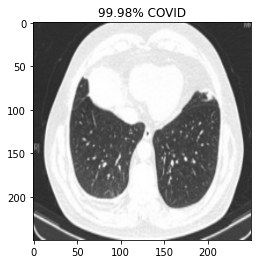

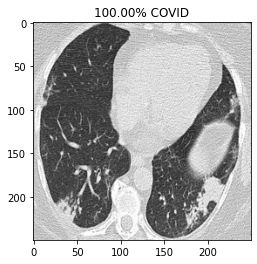

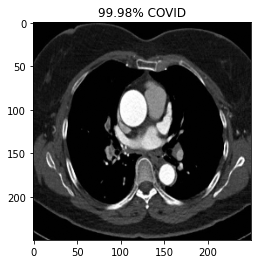

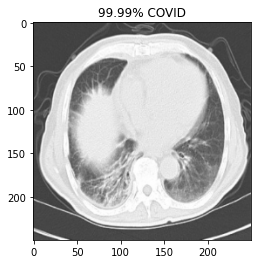

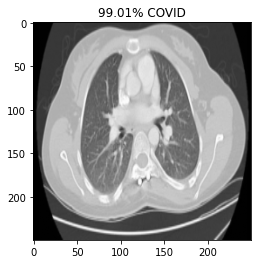

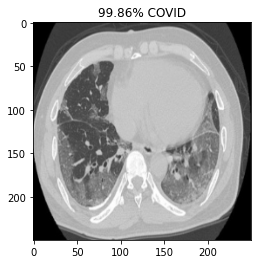

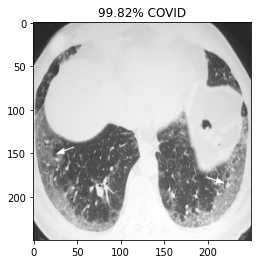

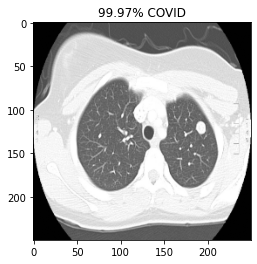

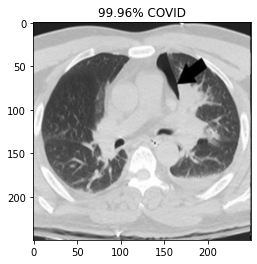

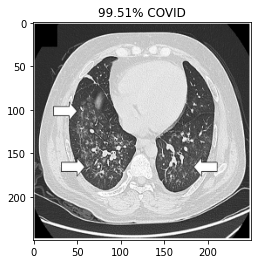

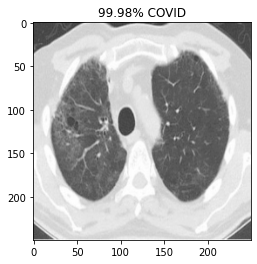

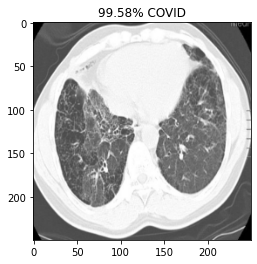

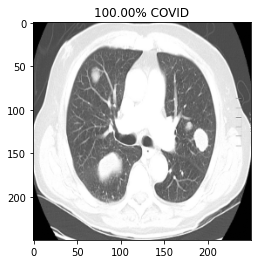

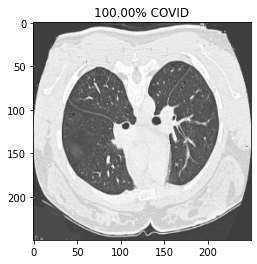

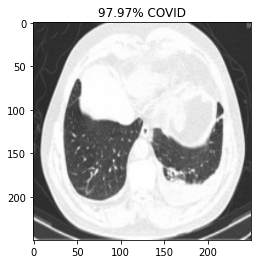

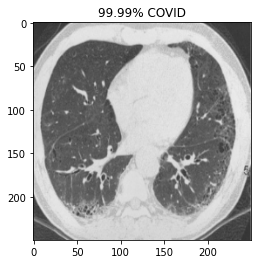

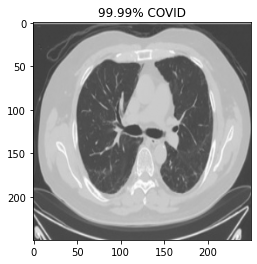

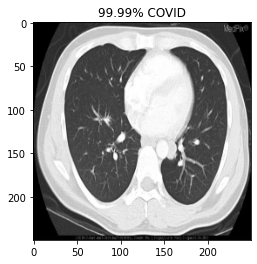

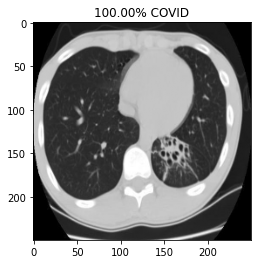

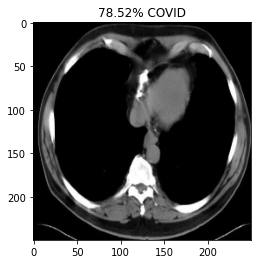

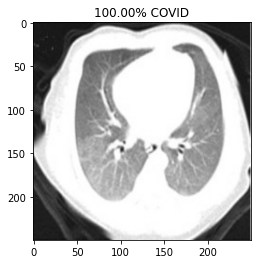

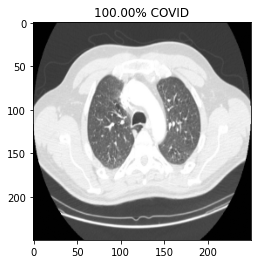

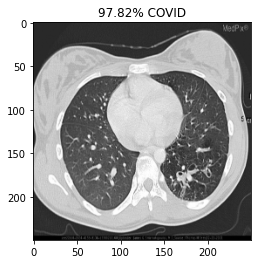

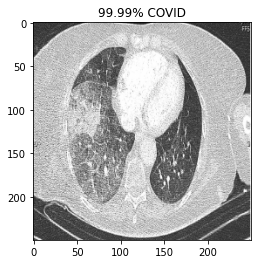

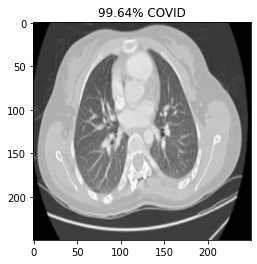

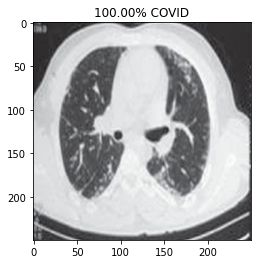

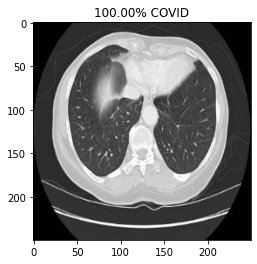

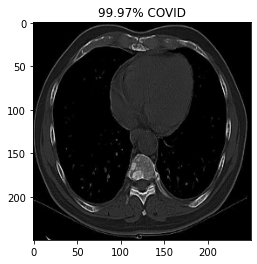

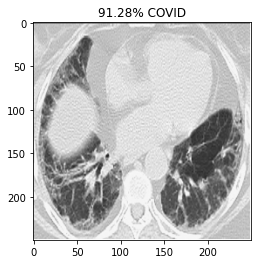

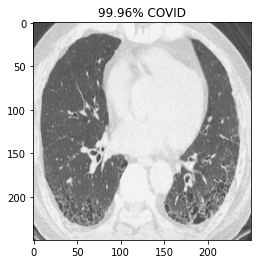

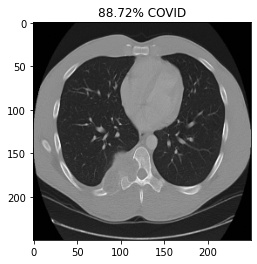

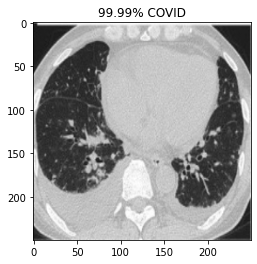

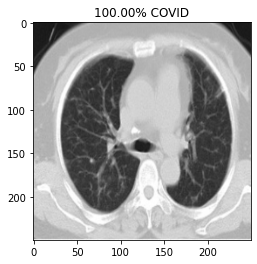

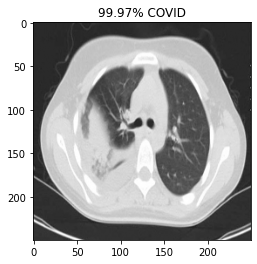

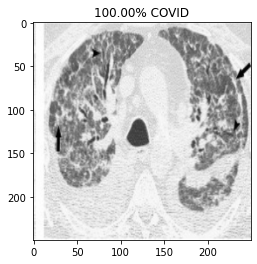

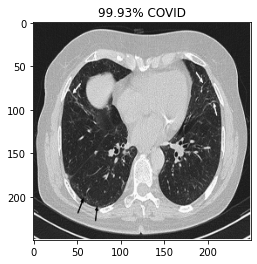

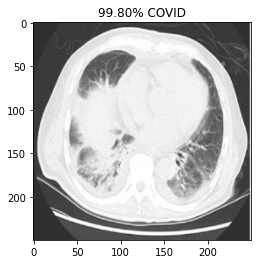

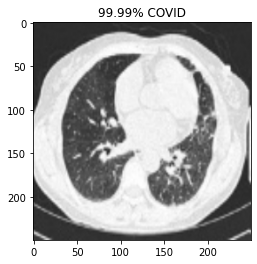

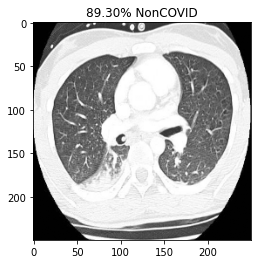

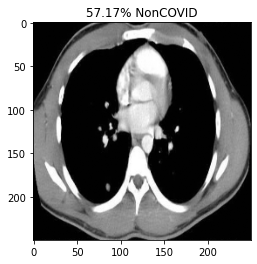

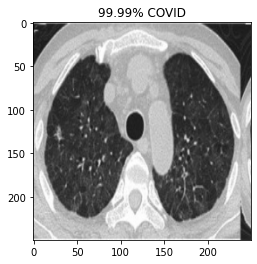

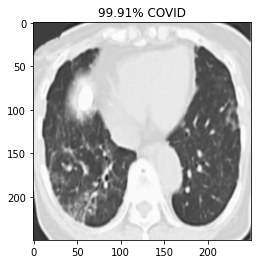

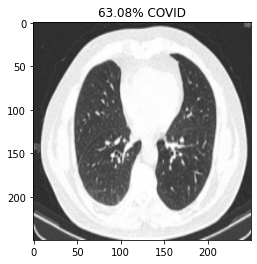

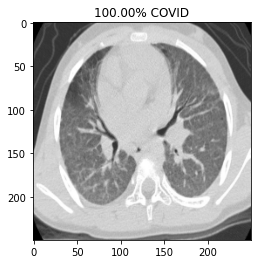

In [ ]:
# Load saved model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# model = load_model('/content/drive/MyDrive/Colab Notebooks/vgg_ct_trail_50_epoch.h5')
y_pred = model.predict(X_test, batch_size=batch_size)

#Let's Look the 1 to 50 images#

prediction=y_pred[1:50]
for index, probability in enumerate(prediction):
  if probability[0] > 0.5:
        plt.title('%.2f' % (probability[0]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[0])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

Let's Try algorithm on random image of CT scan. (POSITIVE COVID19)
Patient detail

COVID-19 pneumonia - lung window
Age: 75 years
Gender: male
normal image ref: https://radiopaedia.org/cases/covid-19-pneumonia-12?lang=gb

1/1 [==============================] - 0s 120ms/step
[[6.0327166e-05]]


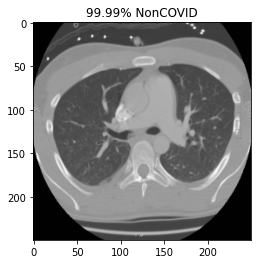

In [ ]:
# First try on random positive image Let's see how algorithm works.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/covidpositiverandom.jpeg')
img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
img  = cv2.resize(img,(224,224))                 # resize as per model

x = img_to_array(img)  # Numpy array with shape (250, 250, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 250, 250, 3)

# Rescale by 1/255 
x /= 255

# Make prediction
successive_feature_maps = model.predict(x)
print(successive_feature_maps)

for index, probability in enumerate(successive_feature_maps):
  if probability[0] > 0.5:
        plt.title('%.2f' % (probability[0]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[0])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

Let's Try algorithm on random image of CT scan. (Negative COVID19)
Image is negative let's see how algorithms works on that.

Patient detail

Negative HRCT for COVID19 - lung window
Patient have HRCT of lung showing extensive fibrosis possibly from usual interstitial pneumonitis. There is also a large emphysematous bullae.
normal image ref: https://en.wikipedia.org/wiki/High-resolution_computed_tomography#/media/File:Pulmon_fibrosis.PNG

1/1 [==============================] - 0s 68ms/step
[[0.99998283]]


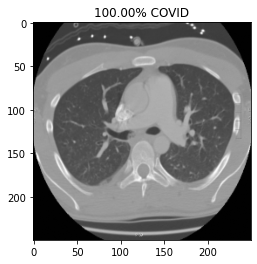

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/covidnegativerandomimage.png')
img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
img  = cv2.resize(img,(224,224))                 # resize as per model

x = img_to_array(img)  # Numpy array with shape (250, 250, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 250, 250, 3)

# Rescale by 1/255 
x /= 255

# Make prediction
successive_feature_maps = model.predict(x)
print(successive_feature_maps)

for index, probability in enumerate(successive_feature_maps):
  if probability[0] > 0.5:
        plt.title('%.2f' % (probability[0]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[0])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()